In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


**Importing Required Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import norm, boxcox
from scipy import stats
from imblearn.over_sampling import SMOTE


**Loading the red wine quality dataset**

In [3]:
df = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **Exploring the dataset**

1. **Checking No. of rows and columns**

In [4]:
print('Shape of the dataset')
print(df.shape)


Shape of the dataset
(1599, 12)


2. **Checking for null values**

In [5]:
print('Checking for the null values')
print(df.isnull().sum())

Checking for the null values
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


3. **Checking the data types of each feautes and nows of rows and null count**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


4. **Cheking the no. of rows, mean value of each rows, std and five number summary**

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# EDA

**Quality count**

<AxesSubplot:xlabel='quality', ylabel='count'>

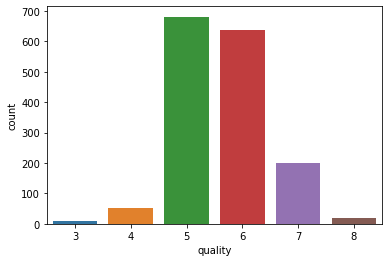

In [8]:
sns.countplot(x ='quality', data = df)

In [9]:
from collections import Counter
Counter(df['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

**Alcohol VS Quality**

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

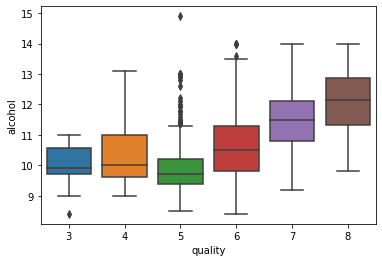

In [10]:
sns.boxplot(x="quality",y="alcohol", data=df)

we can see that as we are increasing the alcholo the quality of wine is improving.

**Residual sugar VS Quality**

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

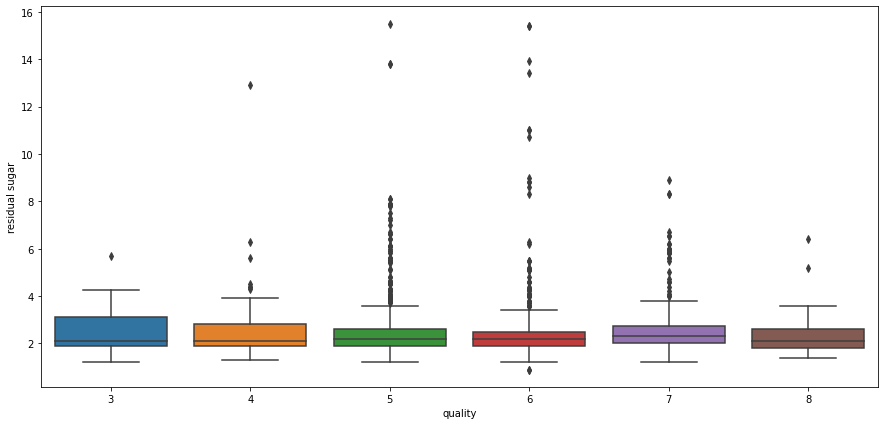

In [11]:
plot = plt.figure(figsize=(15,7))
sns.boxplot(x="quality",y="residual sugar", data=df)

we can see that there is no correlation between the residual sugar and quality.
So, we will drop this column as it has not contribution in determining the qulaity.

**Instead of checking one by one we can use correlation matrix and heat map to analyse the correlation between each feature at once**

**volatile acidity VS Quality**

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

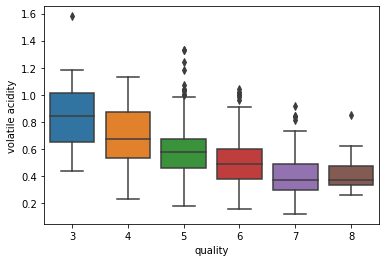

In [12]:
sns.boxplot(x="quality",y="volatile acidity", data=df)

**PH VS Quality**

<AxesSubplot:xlabel='quality', ylabel='pH'>

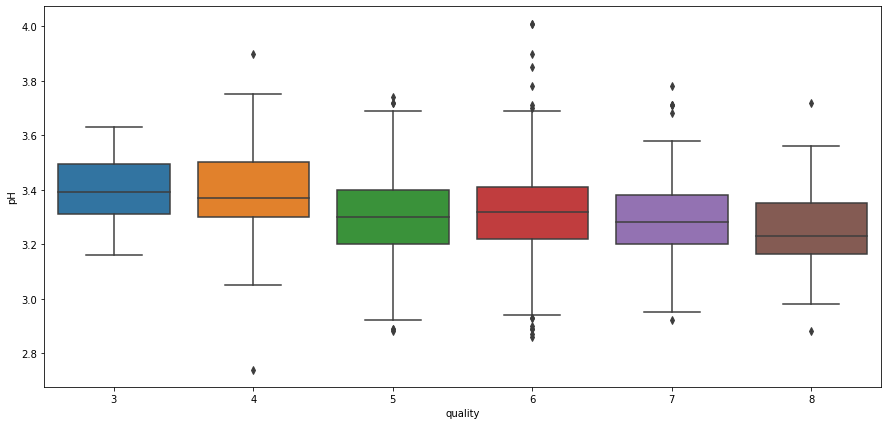

In [13]:
plot = plt.figure(figsize=(15,7))
sns.boxplot(x="quality",y="pH", data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

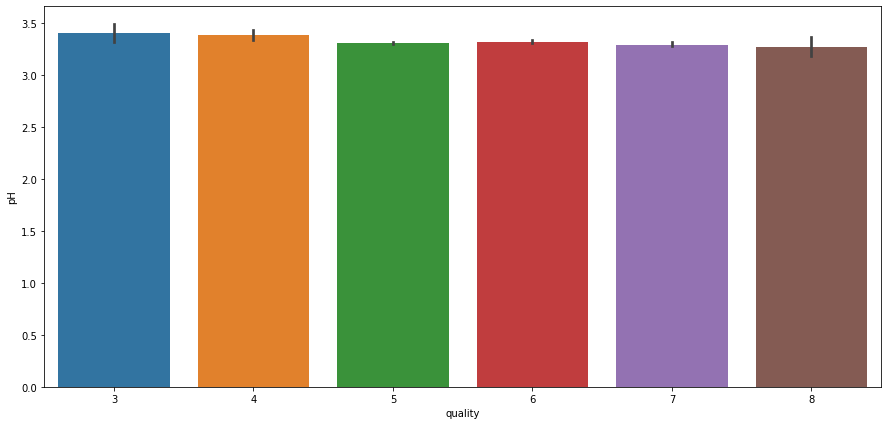

In [14]:
plot = plt.figure(figsize=(15,7))
sns.barplot(x="quality",y="pH", data=df)

# Heatmap for correlation between all features

<AxesSubplot:>

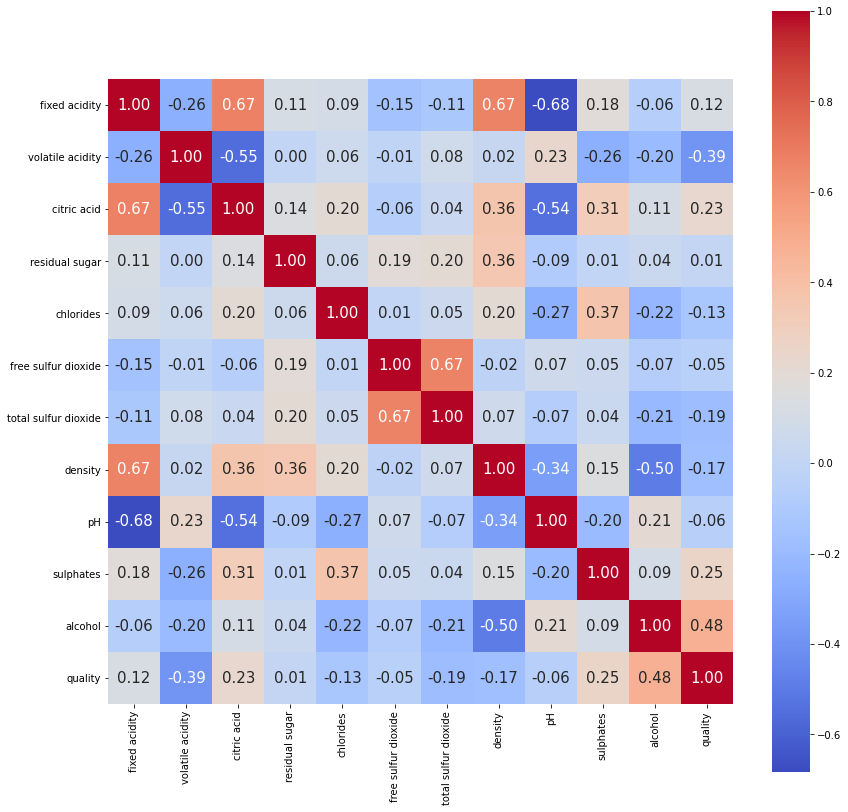

In [15]:
correlation = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':15}, cmap = 'coolwarm')

# **Treating outliers**

I am going to use IQR method remove the outlier. The value which is above the Q3+ 1.5IQR and below Q1-1.5IQR are considers as Outliers.
So we are removeing all those value from selected columns.

In [16]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# **Checking for skewness**

Skewd diustribution gives bias result on training. So it need to be fixed before training it.

We will first check the data for each features is following normal distribution or not using distplot.

if it is not following then we will use the boxcox to treat the skewness.
boxcox transofrm the skewed data into normal distribution.

**1. fixed acidity**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


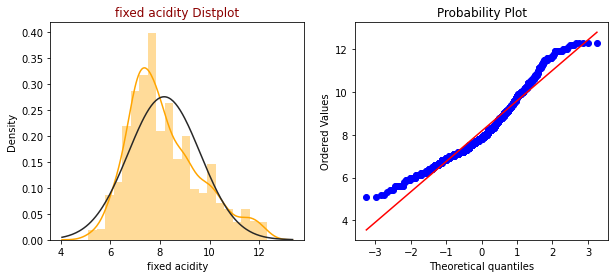

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["fixed acidity"], plot = plt)
plt.show()

**Fixing skewness using boxcox**

In [18]:
df["fixed acidity"], lam = boxcox(df["fixed acidity"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


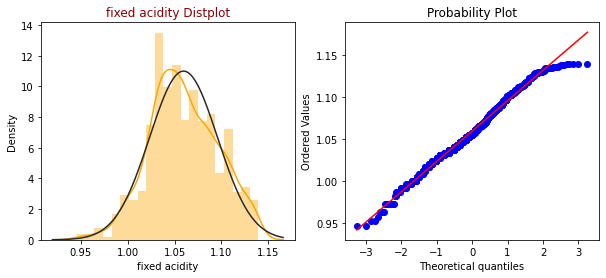

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["fixed acidity"], plot = plt)
plt.show()

**2. residual sugar**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


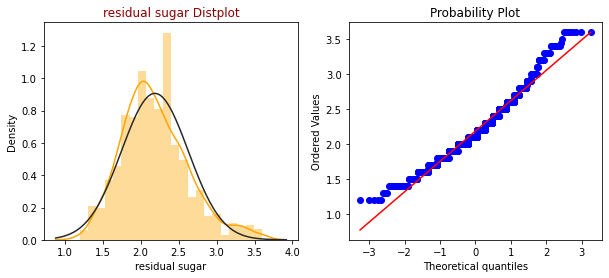

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["residual sugar"], plot = plt)
plt.show()

**Fixing skewness using boxcox**

In [21]:
df["residual sugar"], lam_fixed_acidity = boxcox(df["residual sugar"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


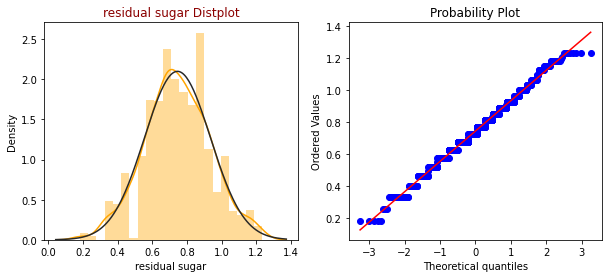

In [22]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["residual sugar"], plot = plt)
plt.show()

**3. free sulfur dioxide**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


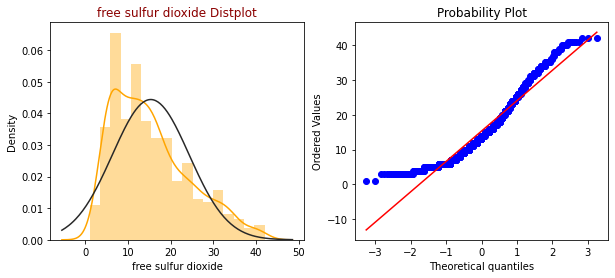

In [23]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["free sulfur dioxide"], fit=norm, color="orange")
plt.title("free sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["free sulfur dioxide"], plot = plt)
plt.show()

In [24]:
#Fixing skewness using boxcox
df["free sulfur dioxide"], lam_fixed_acidity = boxcox(df["free sulfur dioxide"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


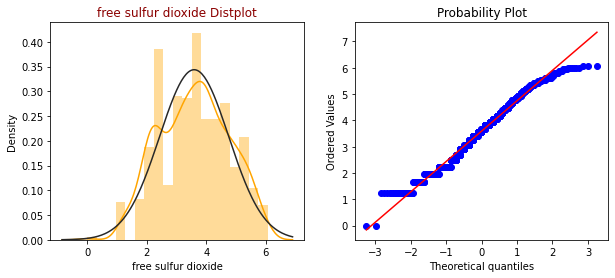

In [25]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["free sulfur dioxide"], fit=norm, color="orange")
plt.title("free sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["free sulfur dioxide"], plot = plt)
plt.show()

**4. total sulfur dioxide**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


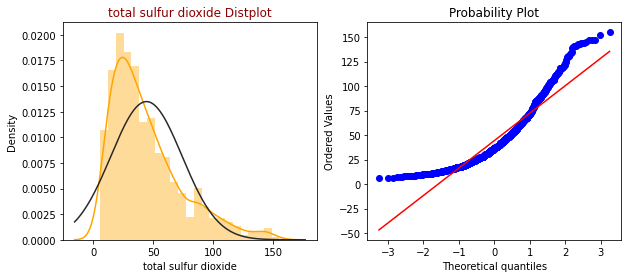

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["total sulfur dioxide"], fit=norm, color="orange")
plt.title("total sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["total sulfur dioxide"], plot = plt)
plt.show()

In [27]:
#Fixing skewness using boxcox
df["total sulfur dioxide"], lam_fixed_acidity = boxcox(df["total sulfur dioxide"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


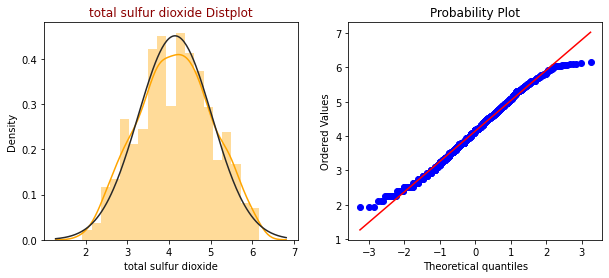

In [28]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["total sulfur dioxide"], fit=norm, color="orange")
plt.title("total sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["total sulfur dioxide"], plot = plt)
plt.show()

**5. alcohol**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


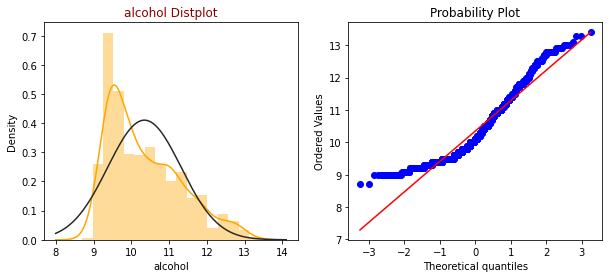

In [29]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["alcohol"], fit=norm, color="orange")
plt.title("alcohol Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["alcohol"], plot = plt)
plt.show()

In [30]:
#Fixing skewness using boxcox
df["alcohol"], lam_fixed_acidity = boxcox(df["alcohol"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


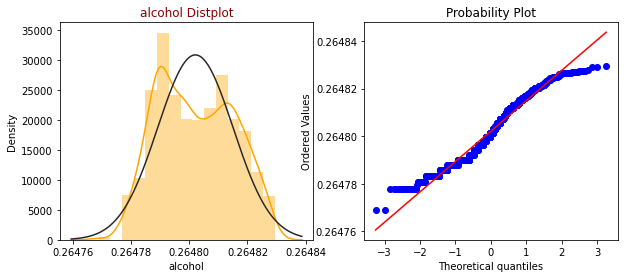

In [31]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["alcohol"], fit=norm, color="orange")
plt.title("alcohol Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["alcohol"], plot = plt)
plt.show()

# **Preprocessing the data**

In [32]:
X = df.drop('quality',axis=1)

# Multiclassification

In [33]:
# dividing the target variable (quality) into 3 class.
# class1: bad (qulaity 3,4), Class2: Avergae (qulaity 5,6,7), Class3: Good (qulaity 8)
reviews = []
for i in df['quality']:
    if i >= 3 and i <= 4:
        reviews.append('1')
    elif i >= 5 and i <= 7:
        reviews.append('2')
    elif i == 8:
        reviews.append('3')
df['Reviews'] = reviews

In [34]:
Counter(df['Reviews'])

Counter({'2': 1174, '1': 36, '3': 12})

# **Standarisation**

**Why we need standarisation?**
Data standardization is about making sure that data is internally consistent; that is, each data type has the same content and format.

For example, suppose you and your friend went to different universities. One day, you both got your midterm grades for your Physics 101 classes. Your professor sticks to the normal grading scale (out of 100), so you got a grade of 84; the test has a mean of 77 and a standard deviation of 6. Your friend’s professor, though, uses his own grading scale, so she got a grade of 452. Her test has a scale of 750, mean of 400, and standard deviation of 100.

Both of you scored above average, but who did better? While the main data points might not be immediately comparable, there is a way to standardize and compare the data points. Converting them to percentages shows that you came out ahead, with an 84% compared to your friend’s 60%.

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


# **PCA for dimension reduction**

pca removes features which has less contribiuton in 

In [36]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)


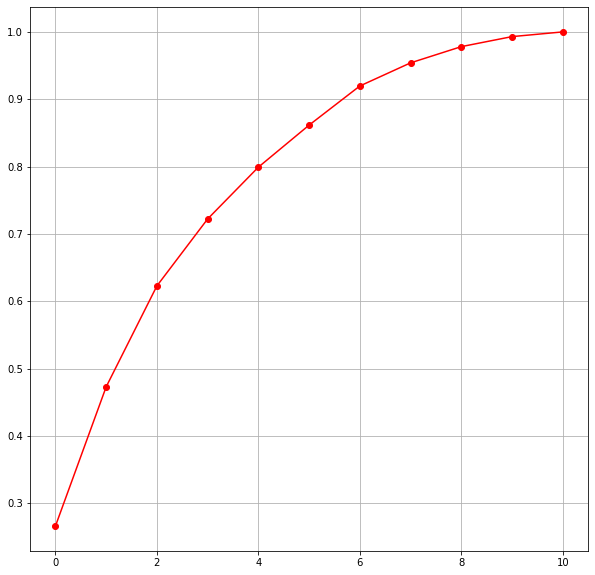

In [37]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [38]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=8)
X_new = pca_new.fit_transform(X)


**Spliting the data in train and test**

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, reviews, test_size = 0.25)

# **SMOTE**

**fixing the imbalance dataset**

we need to fix imbaalnce dataset becuase imbalamce dataset gives biased result

In [40]:
sm = SMOTE(random_state=14)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [41]:
import collections
print("change is value of count after using smote:", collections.Counter(Y_train))

change is value of count after using smote: Counter({'2': 877, '3': 877, '1': 877})


# Training the data

**Random forest classifier**

In [42]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

**Checking the accuracy**

In [43]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.934640522875817
